In [1]:
import pandas as pd

train = pd.read_csv('/mnt/ml-team/minerva/toxic/data/train.csv')
test = pd.read_csv('/mnt/ml-team/minerva/toxic/data/test.csv')

In [2]:
train.head(2)

id                                       comment_text  toxic  \
0  22256635  Nonsense?  kiss off, geek. what I said is true...      1   
1  27450690  "\n\n Please do not vandalize pages, as you di...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0

In [3]:
train['chars'] = train['comment_text'].astype(str).apply(len)
test['chars'] = test['comment_text'].astype(str).apply(len)

In [4]:
train['chars'].describe()

count    95851.000000
mean       395.341864
std        595.102072
min          6.000000
25%         96.000000
50%        206.000000
75%        435.000000
max       5000.000000
Name: chars, dtype: float64

In [5]:
test['chars'].describe()

count    2.269980e+05
mean     4.737803e+02
std      4.445600e+03
min      1.000000e+00
25%      6.800000e+01
50%      2.180000e+02
75%      5.290000e+02
max      2.003165e+06
Name: chars, dtype: float64

In [6]:
train_comments = list(train['comment_text'].values)
train_comments = ' '.join(train_comments)
print(len(set(train_comments)))

1988


In [7]:
test_comments = list(test['comment_text'].astype(str).values)
test_comments = ' '.join(test_comments)
print(len(set(test_comments)))

3652


In [9]:
def count_words(x):
    return len(x.split())

train['words'] = train['comment_text'].astype(str).apply(count_words)
test['words'] = test['comment_text'].astype(str).apply(count_words)

In [10]:
train['words'].describe()

count    95851.000000
mean        67.423605
std         99.806779
min          1.000000
25%         17.000000
50%         36.000000
75%         75.000000
max       1403.000000
Name: words, dtype: float64

In [11]:
test['words'].describe()

count    226998.000000
mean         73.763963
std         235.546519
min           1.000000
25%          10.000000
50%          35.000000
75%          84.000000
max       58515.000000
Name: words, dtype: float64

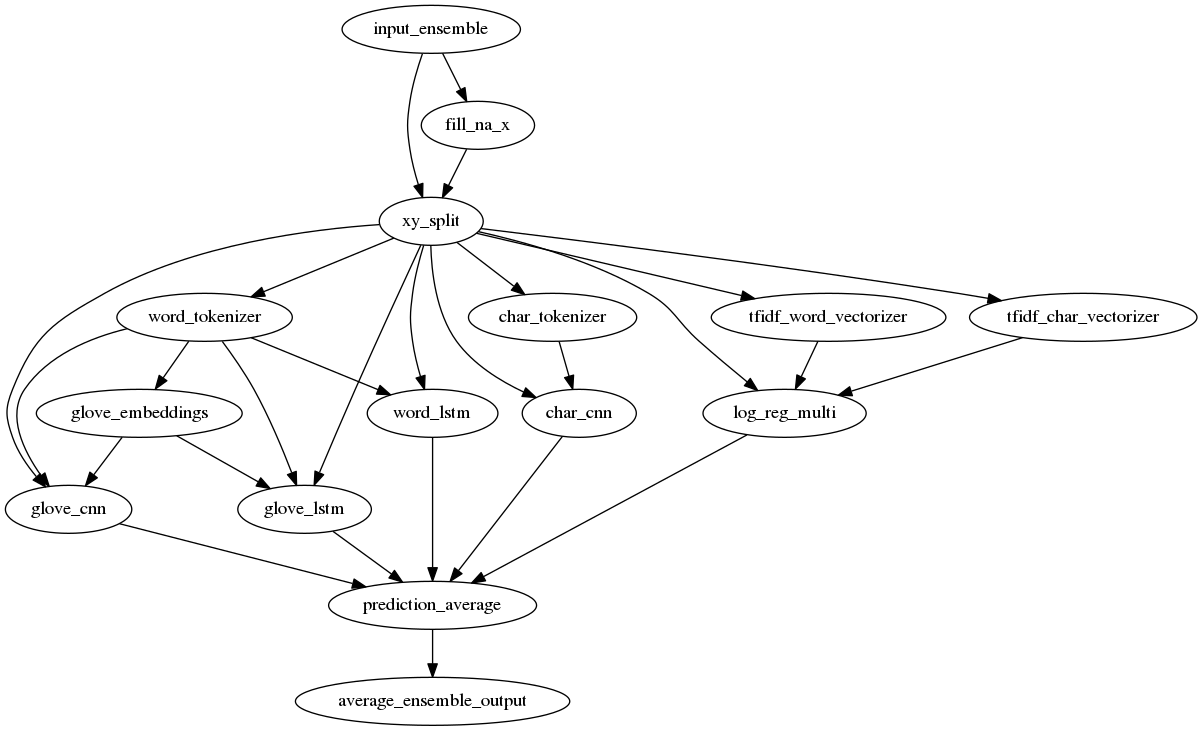

In [14]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''
from pipeline_config import SOLUTION_CONFIG
from pipelines import ensemble_train_pipeline

pipe = ensemble_train_pipeline(SOLUTION_CONFIG)
pipe

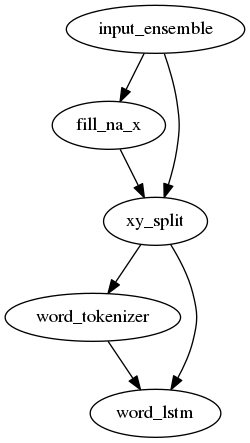

In [15]:
pipe.get_step('word_lstm')